In [9]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define HMM parameters
initial_probabilities = {"/s/": 1.0, "/p/": 0.0, "/ie:/": 0.0, "/tS/": 0.0}

transition_probabilities = {
    "/s/": {"/s/": 0.1, "/p/": 0.8, "/ie:/": 0.1, "/tS/": 0.0},
    "/p/": {"/s/": 0.0, "/p/": 0.1, "/ie:/": 0.8, "/tS/": 0.1},
    "/ie:/": {"/s/": 0.0, "/p/": 0.0, "/ie:/": 0.2, "/tS/": 0.8},
    "/tS/": {"/s/": 0.2, "/p/": 0.0, "/ie:/": 0.0, "/tS/": 0.8},
}

emission_probabilities = {
    "/s/": {"Energy": 0.7, "Pitch": 0.2, "Duration": 0.1},
    "/p/": {"Energy": 0.5, "Pitch": 0.3, "Duration": 0.2},
    "/ie:/": {"Energy": 0.3, "Pitch": 0.5, "Duration": 0.2},
    "/tS/": {"Energy": 0.4, "Pitch": 0.4, "Duration": 0.2},
}

In [4]:
def display_hmm_parameters():
    print("Initial Probabilities:")
    for state, prob in initial_probabilities.items():
        print(f"{state}: {prob}")
    
    print("\nTransition Probabilities:")
    for from_state, to_states in transition_probabilities.items():
        print(f"{from_state}: {to_states}")
    
    print("\nEmission Probabilities:")
    for state, emissions in emission_probabilities.items():
        print(f"{state}: {emissions}")

In [5]:
def generate_sequence():
    phonemes = list(initial_probabilities.keys())
    sequence = []
    observations = []

    current_state = np.random.choice(phonemes, p = [initial_probabilities[p] for p in phonemes])
    sequence.append(current_state)

    for _ in range(len(phonemes) - 1):
        probabilities  = [transition_probabilities[current_state][next_state] for next_state in phonemes]
        current_state = np.random.choice(phonemes, p = probabilities)
        sequence.append(current_state)

    for state in sequence:
        observations.append(np.random.choice(['Energy', 'Pitch', 'Duration'], p = list(emission_probabilities[state].values())))
    
    return sequence, observations

In [15]:
def plot_transition_matrix():
    phonemes = list(initial_probabilities.keys())
    matrix = np.array([[transition_probabilities[from_state][to_state] for to_state in phonemes] for from_state in phonemes])
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap="Reds", xticklabels=phonemes, yticklabels=phonemes)
    plt.title("State Transition Probabilities")
    plt.xlabel("To State")
    plt.ylabel("From State")
    plt.show()

In [39]:
def plot_emission_probabilities():
    for phoneme, emissions in emission_probabilities.items():
        observations = list(emissions.keys())
        probabilities = list(emissions.values())
        plt.figure()
        sns.barplot(x = observations, y = probabilities, palette='YlGnBu')
        plt.title(f"Emission Probabilities for {phoneme}")
        plt.xlabel("Observations")
        plt.ylabel("Probability")
        plt.ylim(0, 1)
        plt.show()

In [40]:
def plot_generated_sequence(sequence):
    plt.figure(figsize=(10, 2))
    plt.plot(sequence, marker="o", linestyle="-", color="blue")
    plt.title("Generated Phoneme Sequence")
    plt.xlabel("Step")
    plt.ylabel("Phoneme")
    plt.grid(True)
    plt.show()

In [41]:
display_hmm_parameters()

Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tS/: 0.0

Transition Probabilities:
/s/: {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0}
/p/: {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1}
/ie:/: {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8}
/tS/: {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}

Emission Probabilities:
/s/: {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}
/p/: {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}
/ie:/: {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}
/tS/: {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}


In [42]:
phoneme_sequence, acoustic_observations = generate_sequence()

In [43]:
print("\nGenerated Phoneme Sequence:", phoneme_sequence)
print("Generated Acoustic Observations:", acoustic_observations)


Generated Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/tS/']
Generated Acoustic Observations: ['Energy', 'Energy', 'Pitch', 'Energy']


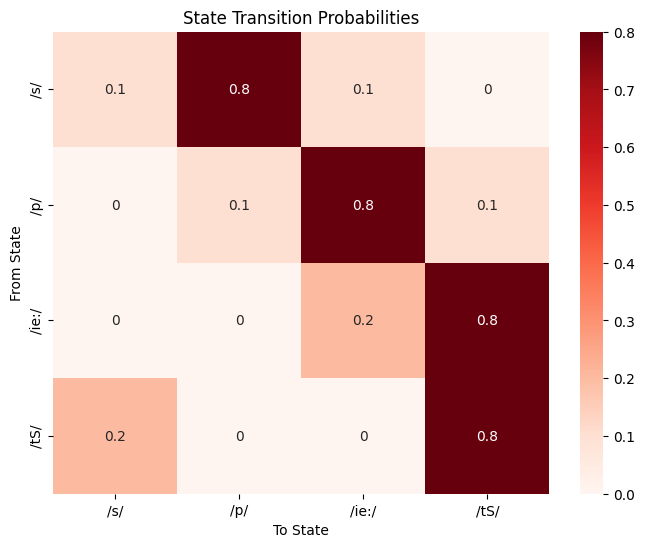

In [44]:
plot_transition_matrix()

C:\Users\noelm\AppData\Local\Temp\ipykernel_4264\666302754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = observations, y = probabilities, palette='YlGnBu')


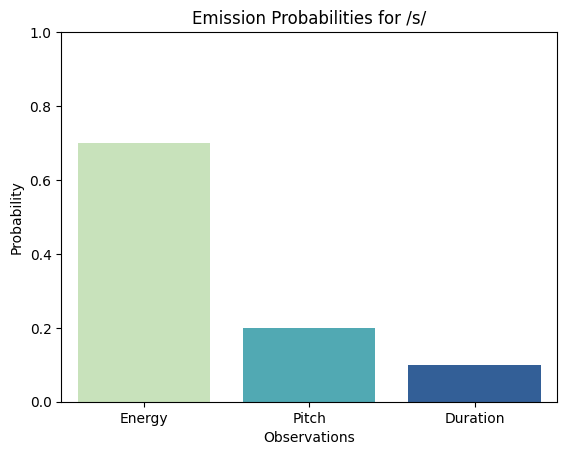

C:\Users\noelm\AppData\Local\Temp\ipykernel_4264\666302754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = observations, y = probabilities, palette='YlGnBu')


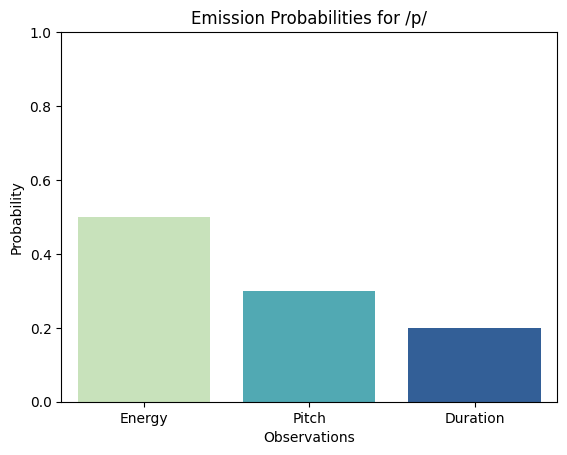

C:\Users\noelm\AppData\Local\Temp\ipykernel_4264\666302754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = observations, y = probabilities, palette='YlGnBu')


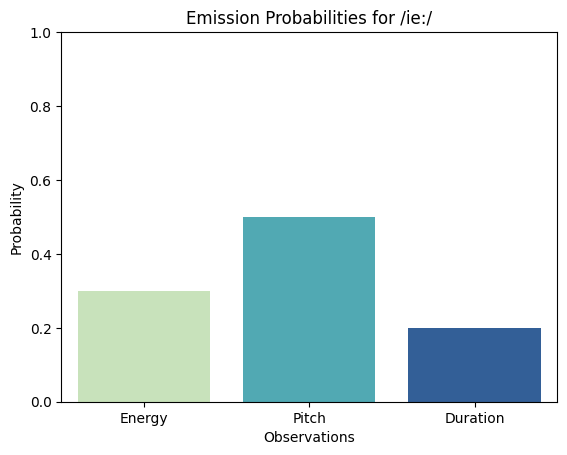

C:\Users\noelm\AppData\Local\Temp\ipykernel_4264\666302754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = observations, y = probabilities, palette='YlGnBu')


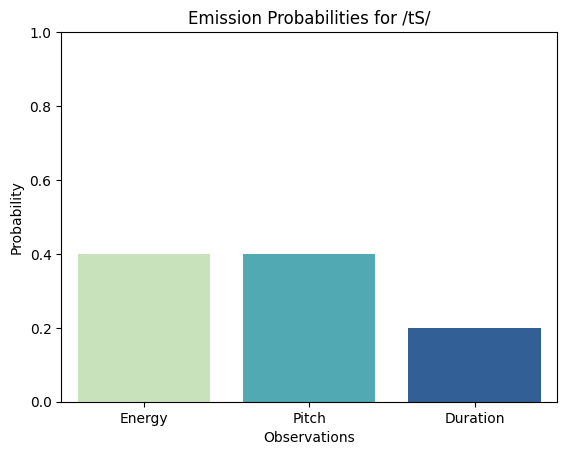

In [45]:
plot_emission_probabilities()

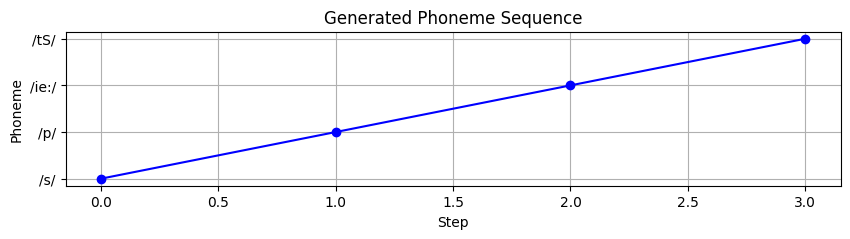

In [46]:
plot_generated_sequence(phoneme_sequence)